### The note book will evaluate how much time the openvoice needed to genereated cloned voice ###


In [3]:
import time
from generate_cloned_voice import generate_cloned_voice

Even if we execute the same audio file, and produce the same output, the execution time is different

In [4]:
execution_times = []

for _ in range(10):
    start_time = time.time()
    generate_cloned_voice("resources/demo_speaker0.mp3","I love u")
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)

print("Execution times:")
for i, time in enumerate(execution_times, 1):
    print(f"Iteration {i}: {time:.4f} seconds")

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!
Execution times:
Iteration 1: 2.6441 seconds
Iteration 2: 2.3891 seconds
Iteration 3: 2.5223 seconds
Iteration 4: 2.3600 seconds
Iteration 5: 2.4951 seconds
Iteration 6: 2.5310 seconds
Iteration 7: 2.4067 seconds
Iteration 8: 2.8204 seconds
Iteration 9: 2.3816 seconds
Iteration 10: 2.3885 seconds


Therefore, to to reduce invariance, the same voice cloning process will be execueted 10 times and we will get the avaverge of that

In [9]:
import time
import statistics
def avg_execution_time(reference_speaker_path, inputtext):
    execution_times = []

    for _ in range(10):
        start_time = time.time()
        generate_cloned_voice(reference_speaker_path, inputtext)
        end_time = time.time()
        execution_time = end_time - start_time
        execution_times.append(execution_time)
    average_time = statistics.mean(execution_times)
    return average_time


### Trial one: Different output length vs execution time ###


In [11]:
text_lengths = [1, 5, 10, 15, 50, 100]  

execution_times = []

for length in text_lengths:
    input_text = "I love u" * length
    execution_time = avg_execution_time("resources/demo_speaker0.mp3", input_text)
    execution_times.append(execution_time)

print("Execution times:")
for i, time in enumerate(execution_times, 1):
    print(f"Text length: {text_lengths[i-1]}, Execution time: {time:.4f} seconds")



/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:50
 length:50
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:50
 length:50
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:50
 length:50
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:50
 length:50
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:50
 length:50
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:50
 length:50
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:50
 length:50
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:50
 length:50
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:50
 length:50
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:50
 length:50
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:100
 length:100
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:100
 length:100
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:100
 length:100
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:100
 length:100
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:100
 length:100
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:100
 length:100
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:100
 length:100
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:100
 length:100
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:100
 length:100
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:100
 length:100
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:150
 length:150
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:150
 length:150
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:150
 length:150
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:150
 length:150
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:150
 length:150
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:150
 length:150
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:150
 length:150
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:150
 length:150
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:150
 length:150
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju.
 length:150
 length:150
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv j

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv j

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv j

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv j

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv j

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv j

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv j

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv j

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv j

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love u
 > ===========================
aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv ju aɪ ləv j

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love uI love

画一个折线图， demo1，2，3 ， text length vs execution time

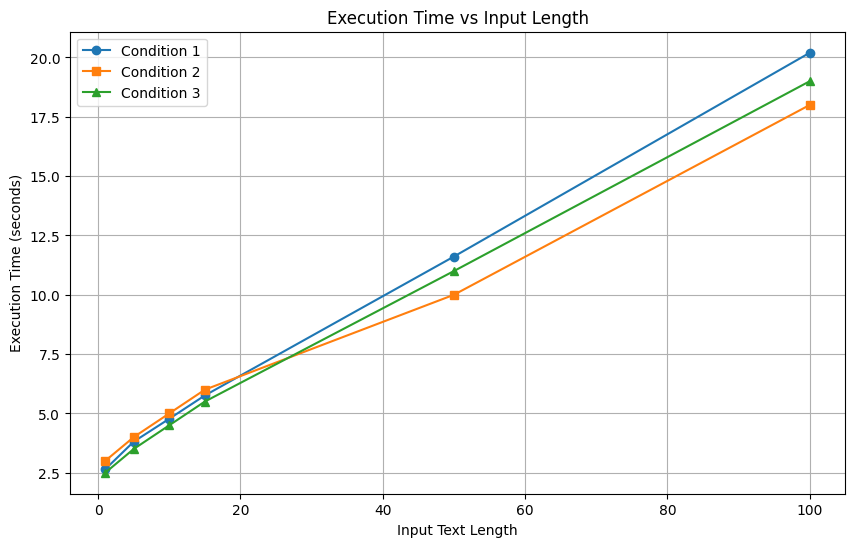

In [12]:
import matplotlib.pyplot as plt

# Assuming you have three arrays of execution times for different conditions
execution_times_1 = [2.6455, 3.8088, 4.7748, 5.7571, 11.6110, 20.1997]
execution_times_2 = [3.0, 4.0, 5.0, 6.0, 10.0, 18.0]
execution_times_3 = [2.5, 3.5, 4.5, 5.5, 11.0, 19.0]

text_lengths = [1, 5, 10, 15, 50, 100]

plt.figure(figsize=(10, 6))
plt.plot(text_lengths, execution_times_1, marker='o', label='Condition 1')
plt.plot(text_lengths, execution_times_2, marker='s', label='Condition 2')
plt.plot(text_lengths, execution_times_3, marker='^', label='Condition 3')
plt.xlabel('Input Text Length')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Input Length')
plt.legend()
plt.grid(True)
plt.show()


### Trial two: Different input auido length vs execution time ###

In [15]:
import time
execution_times = []
audiolist = ["resources/demo_speaker0.mp3", "resources/demo_speaker2.mp3", "resources/demo_speaker1.mp3"] 
audio_lengths = [19,29,91]
for audio in audiolist:
    execution_time = avg_execution_time(audio, "Hi, how are you.")
    execution_times.append(execution_time)

print(execution_times)

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 8.178), (9.326, 12.914), (13.262, 16.402), (16.654, 29.49225)]
after vad: dur = 27.743990929705216
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 8.178), (9.326, 12.914), (13.262, 16.402), (16.654, 29.49225)]
after vad: dur = 27.743990929705216
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 8.178), (9.326, 12.914), (13.262, 16.402), (16.654, 29.49225)]
after vad: dur = 27.743990929705216
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 8.178), (9.326, 12.914), (13.262, 16.402), (16.654, 29.49225)]
after vad: dur = 27.743990929705216
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 8.178), (9.326, 12.914), (13.262, 16.402), (16.654, 29.49225)]
after vad: dur = 27.743990929705216
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 8.178), (9.326, 12.914), (13.262, 16.402), (16.654, 29.49225)]
after vad: dur = 27.743990929705216
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 8.178), (9.326, 12.914), (13.262, 16.402), (16.654, 29.49225)]
after vad: dur = 27.743990929705216
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 8.178), (9.326, 12.914), (13.262, 16.402), (16.654, 29.49225)]
after vad: dur = 27.743990929705216
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 8.178), (9.326, 12.914), (13.262, 16.402), (16.654, 29.49225)]
after vad: dur = 27.743990929705216
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 8.178), (9.326, 12.914), (13.262, 16.402), (16.654, 29.49225)]
after vad: dur = 27.743990929705216
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.43, 13.97), (14.51, 29.682), (29.966, 40.722), (41.038, 54.29), (55.086, 59.218), (59.662, 61.266), (62.51, 67.314), (67.438, 69.042), (69.646, 79.442), (80.334, 86.386), (86.414, 91.090875)]
after vad: dur = 85.38802721088436
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.43, 13.97), (14.51, 29.682), (29.966, 40.722), (41.038, 54.29), (55.086, 59.218), (59.662, 61.266), (62.51, 67.314), (67.438, 69.042), (69.646, 79.442), (80.334, 86.386), (86.414, 91.090875)]
after vad: dur = 85.38802721088436
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.43, 13.97), (14.51, 29.682), (29.966, 40.722), (41.038, 54.29), (55.086, 59.218), (59.662, 61.266), (62.51, 67.314), (67.438, 69.042), (69.646, 79.442), (80.334, 86.386), (86.414, 91.090875)]
after vad: dur = 85.38802721088436
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.43, 13.97), (14.51, 29.682), (29.966, 40.722), (41.038, 54.29), (55.086, 59.218), (59.662, 61.266), (62.51, 67.314), (67.438, 69.042), (69.646, 79.442), (80.334, 86.386), (86.414, 91.090875)]
after vad: dur = 85.38802721088436
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.43, 13.97), (14.51, 29.682), (29.966, 40.722), (41.038, 54.29), (55.086, 59.218), (59.662, 61.266), (62.51, 67.314), (67.438, 69.042), (69.646, 79.442), (80.334, 86.386), (86.414, 91.090875)]
after vad: dur = 85.38802721088436
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.43, 13.97), (14.51, 29.682), (29.966, 40.722), (41.038, 54.29), (55.086, 59.218), (59.662, 61.266), (62.51, 67.314), (67.438, 69.042), (69.646, 79.442), (80.334, 86.386), (86.414, 91.090875)]
after vad: dur = 85.38802721088436
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.43, 13.97), (14.51, 29.682), (29.966, 40.722), (41.038, 54.29), (55.086, 59.218), (59.662, 61.266), (62.51, 67.314), (67.438, 69.042), (69.646, 79.442), (80.334, 86.386), (86.414, 91.090875)]
after vad: dur = 85.38802721088436
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.43, 13.97), (14.51, 29.682), (29.966, 40.722), (41.038, 54.29), (55.086, 59.218), (59.662, 61.266), (62.51, 67.314), (67.438, 69.042), (69.646, 79.442), (80.334, 86.386), (86.414, 91.090875)]
after vad: dur = 85.38802721088436
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.43, 13.97), (14.51, 29.682), (29.966, 40.722), (41.038, 54.29), (55.086, 59.218), (59.662, 61.266), (62.51, 67.314), (67.438, 69.042), (69.646, 79.442), (80.334, 86.386), (86.414, 91.090875)]
after vad: dur = 85.38802721088436
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.43, 13.97), (14.51, 29.682), (29.966, 40.722), (41.038, 54.29), (55.086, 59.218), (59.662, 61.266), (62.51, 67.314), (67.438, 69.042), (69.646, 79.442), (80.334, 86.386), (86.414, 91.090875)]
after vad: dur = 85.38802721088436
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!
[2.644456648826599, 2.938179302215576, 3.923561453819275]


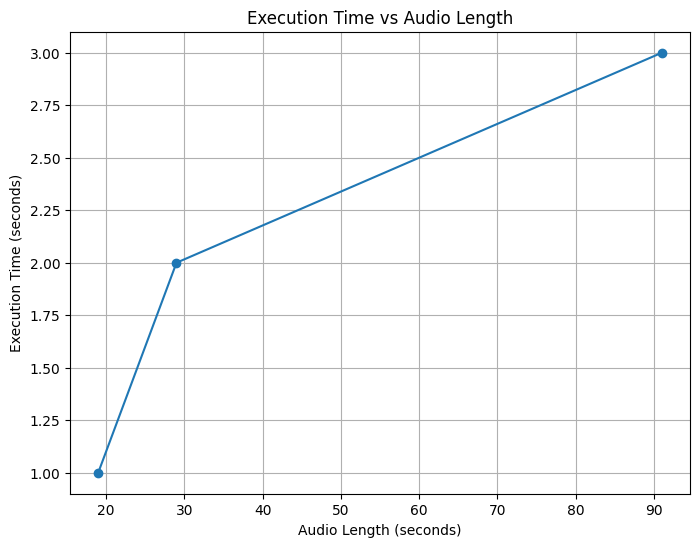

In [16]:
import matplotlib.pyplot as plt

audio_lengths = [19, 29, 91]
execution_times = [1, 2, 3]

plt.figure(figsize=(8, 6))
plt.plot(audio_lengths, execution_times, marker='o')
plt.xlabel('Audio Length (seconds)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Audio Length')
plt.grid(True)
plt.show()
